# Graphical Models: Similarity Distribution Experimentation

In [15]:
# Import necessary libraries
from sde import *
from sklearn.datasets import make_blobs

## Experiment

### make directed graph

In [16]:
g = makeDirectedGraph(5, 7)
edges = nx.edges(g)

print(edges)

[(1, 2), (1, 0), (4, 2), (4, 1)]


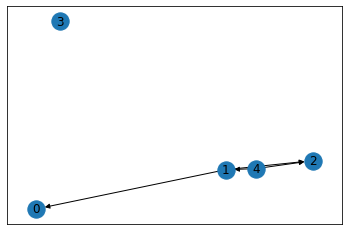

In [17]:
nx.draw_networkx(g)

In [18]:
edge_weights = nx.get_edge_attributes(g, 'weight')
print(edge_weights)

{(1, 2): 0.766588215996896, (1, 0): 0.09776877729017086, (4, 2): 0.9609335472405739, (4, 1): 0.13785153719092236}


In [19]:
# conditional prob P(A|B) = (likelihood*pior)/marginal prob
# likelihood P(B|A). Likelihood = (conditional prob * marginal prob)/pior. Or, P(B|A) = P(A|B)P(B)/P(A)
# prior P(A)
# marginal prob P(B)

def reverseEdgeWeight(conditional_prob):
    '''Accepts a conditional probability value P(A|B), returns P(B|A) and a pair of values for P(A) and P(B) that
        would be consistent with the given conditional probability and its reversed conditional probability.)'''
    prior = random.uniform(0,1)
    marginal_prob = random.uniform(0,1)
    
    likelihood = (conditional_prob*marginal_prob)/prior
    known_conditional_prob = (prior*likelihood)/marginal_prob
    
    if (known_conditional_prob != conditional_prob):
        reverseEdgeWeight(conditional_prob)
    else: return likelihood
        

{(1, 2): 0.16180792557542925, (1, 0): 0.08773275385727283, (4, 2): 1.1293621244370913, (4, 1): 1.1796867797769486}
{(0, 1): 0.08773275385727283, (1, 4): 1.1796867797769486, (2, 4): 1.1293621244370913, (2, 1): 0.16180792557542925}


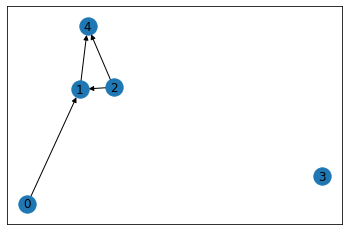

In [20]:
def reverseWeightedDG(dg):
    rdg = nx.reverse_view(dg)
    
    for e in dg.edges():
        rdg[e[::-1][0]][e[::-1][1]]['weight'] = reverseEdgeWeight(dg[e[0]][e[1]]['weight'])
        
    print(nx.get_edge_attributes(dg, 'weight'))
    print(nx.get_edge_attributes(rdg,'weight'))
    return rdg



g_reversed = reverseWeightedDG(g)
nx.draw_networkx(g_reversed)

In [21]:
print('Reversed graph edge data:', nx.get_edge_attributes(g_reversed, 'weight'))

Reversed graph edge data: {(0, 1): 0.08773275385727283, (1, 4): 1.1796867797769486, (2, 4): 1.1293621244370913, (2, 1): 0.16180792557542925}


In [22]:
print('Original graph edge data:', nx.get_edge_attributes(g, 'weight'))

Original graph edge data: {(1, 2): 0.16180792557542925, (1, 0): 0.08773275385727283, (4, 2): 1.1293621244370913, (4, 1): 1.1796867797769486}


# Similarity data

Compare the similarity measures of a weighted graph and its reverse graph

methods adapted from Nico's getSimilarityData function

In [23]:
nodes = list(g.nodes)
node_pairs = list(it.combinations(nodes, 2))

nodes_reversed = list(g_reversed.nodes)
node_pairs_reversed = list(it.combinations(nodes_reversed, 2))

# Similarity method: Jaccard Index

In [24]:
jindex_original = []
for pair in node_pairs:
    jindex_original.append(calculate_similarity(g, pair[0], pair[1])["method 1"])
    jindex_original.append(calculate_similarity(g, pair[1], pair[0])["method 1"])
    
print(jindex_original)

[0.0, 0.0, 0, 0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.16928724658216965, 0.16928724658216965, 0, 0, 0.0, 0.0, 0.0, 0.0]


In [25]:
jindex_reversed = []
for pair in node_pairs_reversed:
    jindex_reversed.append(calculate_similarity(g_reversed, pair[0], pair[1])["method 1"])
    jindex_reversed.append(calculate_similarity(g_reversed, pair[1], pair[0])["method 1"])
    
print(jindex_reversed)

[0.0816597560099774, 0.0816597560099774, 0.542203069134428, 0.542203069134428, 0.0, 0.0, 0.0, 0.0, 0.1422910354419372, 0.1422910354419372, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0]


# Similarity method: Edit distance

based on node children

In [26]:
ed_immediate_sim = []
for pair in node_pairs:
    ed_immediate_sim.append(get_immediate_similarity(g, pair[0], pair[1]))
    ed_immediate_sim.append(get_immediate_similarity(g, pair[1], pair[0]))
    
print(ed_immediate_sim)

[0, 1.0, 0, 0, 0, 0, 0, 1.0, 1.0, 0, 1.0, 0, 0.983777099430831, 0.983777099430831, 0, 0, 0, 1.0, 0, 1.0]


In [27]:
ed_immediate_sim_reversed = []
for pair in node_pairs_reversed:
    ed_immediate_sim_reversed.append(get_immediate_similarity(g_reversed, pair[0], pair[1]))
    ed_immediate_sim_reversed.append(get_immediate_similarity(g_reversed, pair[1], pair[0]))
    
print(ed_immediate_sim_reversed)

[1.0, 1.0, 0.07407517171815642, 0.5370375858590782, 1.0, 0, 1.0, 0, 0.050324655339857305, 0.5251623276699287, 1.0, 0, 1.0, 0, 1.0, 0, 1.0, 0, 0, 0]


based on node descendants

In [28]:
ed_full_sim = []
for pair in node_pairs:
    ed_full_sim.append(get_full_similarity(g, pair[0], pair[1]))
    ed_full_sim.append(get_full_similarity(g, pair[1], pair[0]))
    
print(ed_full_sim)

[0, 1.0, 0, 0, 0, 0, 0, 1.0, 1.0, 0, 1.0, 0, 0.02241958055530703, 0.34827972037020466, 0, 0, 0, 1.0, 0, 1.0]


In [29]:
ed_full_sim_reversed = []
for pair in node_pairs_reversed:
    ed_full_sim_reversed.append(get_full_similarity(g_reversed, pair[0], pair[1]))
    ed_full_sim_reversed.append(get_full_similarity(g_reversed, pair[1], pair[0]))
    
print(ed_full_sim_reversed)

[1.0380948049490493, 1.0761896098980988, 0.08073033625188643, 0.08073033625188643, 1.0, 0, 1.0, 0, 0.9888041091124823, 0.9944020545562411, 1.0, 0, 1.0, 0, 1.0, 0, 1.0, 0, 0, 0]


# Similarity method: Edit-distance (Networkx)

In [30]:
for v in nx.optimize_graph_edit_distance(g, g_reversed):
    minv = v

minv

2.0

In [31]:
nx.optimize_edit_paths(g, g_reversed)

<generator object optimize_edit_paths at 0x000001E8B785F2C8>

In [32]:
nx.graph_edit_distance(g, g_reversed)

2.0